In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
# Chargement et nettoyage des données
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df = df.dropna()

# Suppression des colonnes non pertinentes
df = df.drop(columns=["ID", "Dt_Customer", "Z_CostContact", "Z_Revenue", ])

# Encodage des variables catégorielles
df = pd.get_dummies(df, columns=["Education", "Marital_Status"], drop_first=True)

df = df.drop(columns=['Year_Birth', 'Income', 'Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO'])

df.head()

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58,635,88,546,172,88,88,3,8,10,4,7
1,38,11,1,6,2,1,6,2,1,1,2,5
2,26,426,49,127,111,21,42,1,8,2,10,4
3,26,11,4,20,10,3,5,2,2,0,4,6
4,94,173,43,118,46,27,15,5,5,3,6,5


* Variable Cible

In [50]:
depense_cols = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['TotalSpending'] = df[depense_cols].sum(axis=1)

# Seuil : top 25% des clients par dépenses
seuil = df['TotalSpending'].quantile(0.75)
df['HighSpender'] = (df['TotalSpending'] > seuil).astype(int)

# Vérification
print(df['HighSpender'].value_counts())

HighSpender
0    1663
1     553
Name: count, dtype: int64


In [51]:
# Définir X et y
y = df["HighSpender"]
X = df.drop(columns=["HighSpender", "TotalSpending"])

* Split et Standarisation

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y )

print(X.columns.tolist())
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


Data Trainig

* Random Forest

Random Forest Accuracy: 0.9774774774774775

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       333
           1       0.96      0.95      0.95       111

    accuracy                           0.98       444
   macro avg       0.97      0.97      0.97       444
weighted avg       0.98      0.98      0.98       444



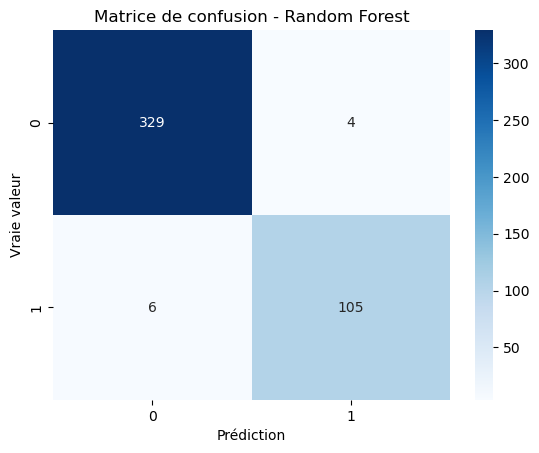

In [53]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.show()

* Logistic Regression

Logistic Regression Accuracy: 0.9797297297297297

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       333
           1       0.93      1.00      0.96       111

    accuracy                           0.98       444
   macro avg       0.96      0.99      0.97       444
weighted avg       0.98      0.98      0.98       444



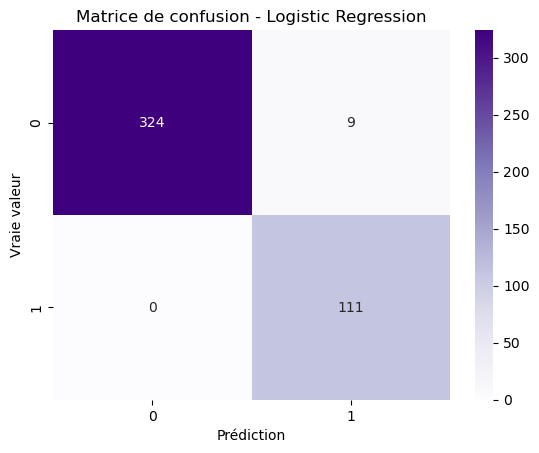

In [54]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Purples')
plt.title("Matrice de confusion - Logistic Regression")
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.show()

=> Random Forest est légèrement moins performante et a tendance à sous-classer certains VIP par rapport à LR.

Sauvegarde du modèle - JobLib

In [55]:
import joblib

# Sauvegarder le modèle et le scaler
joblib.dump(logreg, "vip_prediction.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']